# FBB you are fitting a line to random data insted of the data in the problem! The first part is as a consequence all wrong. You should have noticed that your line fit was way off the datapoints! If the visualizations you make make no sense, then chances are you did something wrong. If you were trying to describe the figure in the captions that would have helped spotting that there is an issue. 

# you MUST label, give titles, and decribe with captions your figure to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code. The notebook is a "presentation". This requirement includes using large enough fonts and figures!

# if you do not discuss the figure I do not know if you know what you are doing and are understanding the analysis and science, other than being able to code up formulae. So the "right" plots have the same validity as the "wrong" plots unless you describe them.

# The notebooks should not contain my instructions.  make it your own notebook. All outputs should be justified and described like all figures, or removed. 

# In the conclusions, though you noticed some interesting things, you missed the covariance of race and income which invalidates the first part of the analysis (and perhaps the second too)


# look for all cells containing FBB to see more comments in the body of the notebook

## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [2]:
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm

import json
import os




%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [4]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [5]:
allmales = {}
allmales['all'] = pd.read_excel(url + "pinc" + "08_2" + "_1_1" + ".xls", header=9)
allmales['white'] = pd.read_excel(url + "pinc" + "08_2" + "_1_4" + ".xls" ,header=9 )
allmales['black'] = pd.read_excel(url + "pinc" + "08_2" + "_1_6" + ".xls", header=9)
allmales['asian'] = pd.read_excel(url + "pinc" + "08_2" + "_1_8" + ".xls", header=9)
allmales['hispanic'] = pd.read_excel(url + "pinc" + "08_2" + "_1_9" + ".xls", header=9)


In [6]:
allfemales = {}
allfemales['all'] = pd.read_excel(url + "pinc" + "08_3" + "_1_1" + ".xls", header=9)
allfemales['white'] = pd.read_excel(url + "pinc" + "08_3" + "_1_4" + ".xls", header=9)
allfemales['black'] = pd.read_excel(url + "pinc" + "08_3" + "_1_6" + ".xls", header=9)
allfemales['asian'] = pd.read_excel(url + "pinc" + "08_3" + "_1_8" + ".xls", header=9)
allfemales['hispanic'] = pd.read_excel(url + "pinc" + "08_3" + "_1_9" + ".xls", header=9)


In [7]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [8]:
allfemales['all']


,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.65,0.0162
5,..Farm Self-Employment,774,592,57,0,21,18,4,4,0,...,0,0,0,15,1635,65,7908,2005,0.916,0.0148
6,Social Security,26923,770,1294,2750,5261,5022,4252,2990,1924,...,0,0,0,0,11686,70,12453,71,0.258,0.0025
7,SSI (Supplemental Security Income),3386,515,559,363,1428,232,130,72,30,...,0,0,0,0,7950,71,7316,129,0.315,0.0088
8,Public Assistance,1541,759,409,257,74,9,17,5,3,...,0,0,0,0,2569,180,3413,149,0.464,0.0139
9,Veterans Benefits,619,79,58,48,68,56,113,49,31,...,0,0,6,0,12501,760,13839,927,0.42,0.0288


In [9]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 


In [10]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### asian
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          809.478261            150.347826         42.413043   
std          1476.967354            439.113765         59.593652   
min             2.000000              0.000000          0.000000   
25%            26.500000              2.000000          2.250000   
50%           147.500000             22.500000         13.000000   
75%           804.250000             62.500000         53.000000   
max          5648.000000           2178.000000        224.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          53.934783         59.434783           56.717391   
std           82.427989         95.528623           93.491215   
min            0.000000          0.000000            0.000000   
25%            0.000000          2.000000         

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

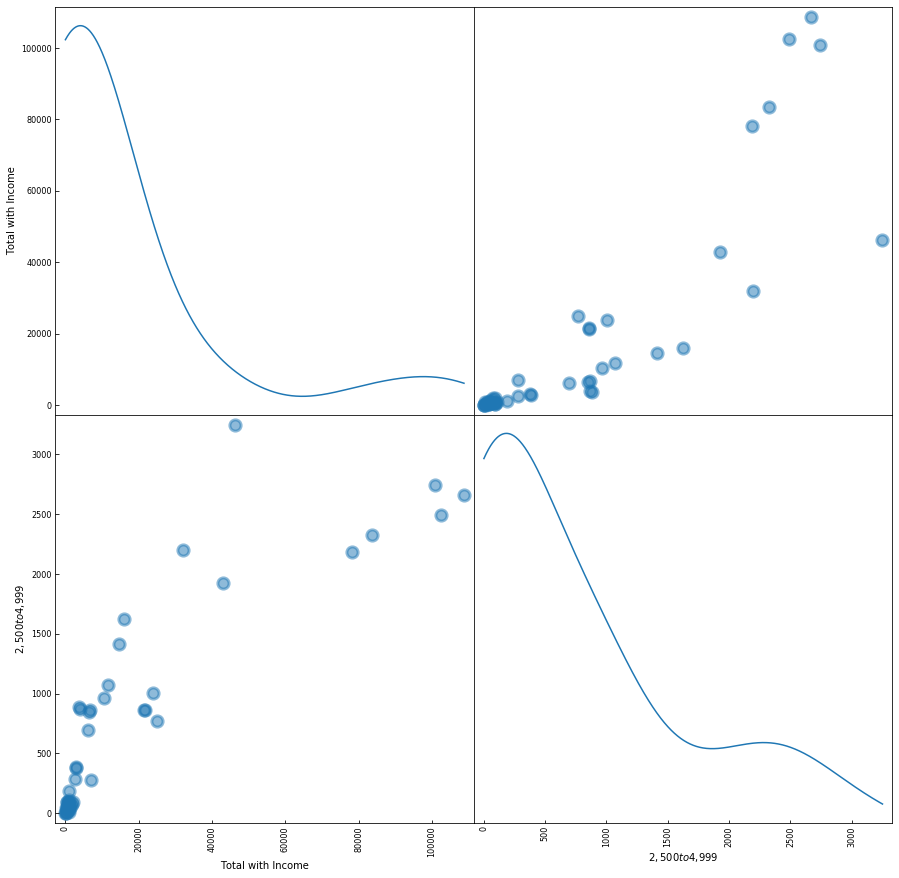

In [11]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

# FBB missing figure caption

In [12]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [13]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

In [14]:
# use scatter_matrix to make this plot... 

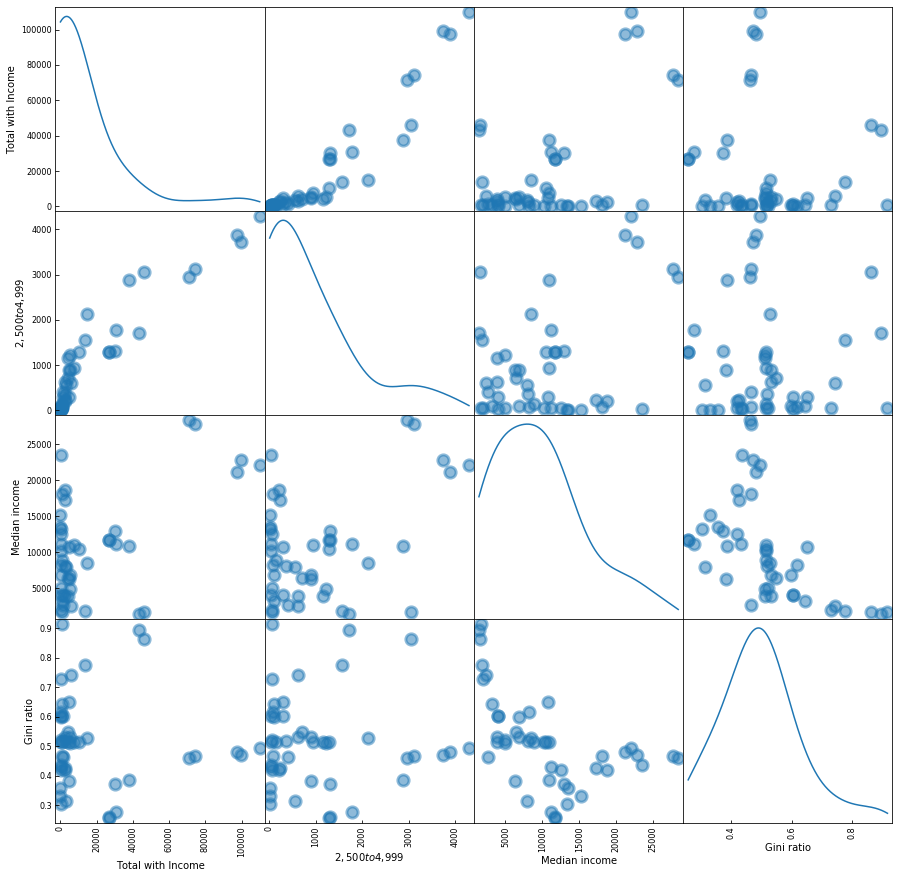

In [15]:
# do the same for all female
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')     

# FBB missing figure caption (and you were supposed to have a scatter matrix for each of the 2 genders)




In [16]:
allfemales["all"].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,NaN,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,NaN,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,NaN,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.650,0.0162


## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

In [17]:
#Total Median Income is the second row
median_female =[]
median_male = []
for i in allfemales:
    median_female.append(allfemales[i].loc[1]["Median income"])
    median_male.append(allmales[i].loc[1]["Median income"])
    

In [18]:
print (median_female, median_male)

[24840.0, 17762.0, 20044.0, 22063.0, 23780.0] [40153.0, 25411.0, 24855.0, 35228.0, 40122.0]


In [19]:
plt.scatter?

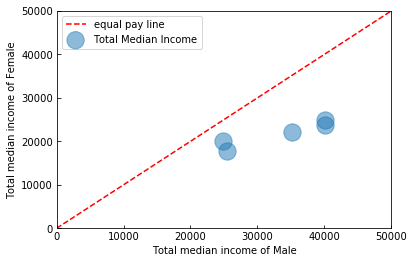

In [20]:
##plotting the Total median incame by race
##pl.scatter...

plt.scatter(median_male, median_female, marker = "o", s=300, alpha = 0.5, label="Total Median Income")
plt.xlabel("Total median income of Male")
plt.ylabel("Total median income of Female")
plt.ylim(0,50000)
plt.xlim(0,50000)

plt.plot([0,50000],[0,50000],"r--", label="equal pay line" )
plt.legend(loc=0)


# FBB missing figure caption of any kind of discussion
# FBB the figure is tiny

# FBB If you want to show inequality here use a squared plot, so the 45degree line can easily identified as the equality line and slopes intuitively compared to it.

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

# FBB this is where things start to get REALLY WRONG: instead of fitting a line to the data in the problem you fit a line to random data!

In [21]:
#fit with whichever method you prefer and plot here
#[...]
from scipy.optimize import minimize


# FBB why are you creating a randome line???
a = np.random.rand(2) 
x = np.arange(0.0,50000.0)

def line(x,a):
    '''
    this function creates a line given parameters
    '''
    y = a[0]*x + a[1]
    return y
    
    
#def residuals(a, x, y):
#    res = y - line(x,a)
#    return sum(res**2)
    

In [22]:
median_female = np.array(median_female)
median_male = np.array(median_male)

In [23]:
#residuals(a, median_male, median_female)

In [24]:
#result = minimize(residuals, [1,1], args=(median_male, median_female))

In [31]:
## FBB why are you making a line with random parameters a??
## There is no randomness involved in this exercise (and if there were you should set a seed!)

y = line(x,a)
X = sm.add_constant(x)

In [26]:
## FBB you are fitting a line to random data insted of the data in the problem!

regress = sm.OLS(y,X)

In [27]:
modelfit = regress.fit()

In [28]:
x_new = np.arange(0, 50000, 100)

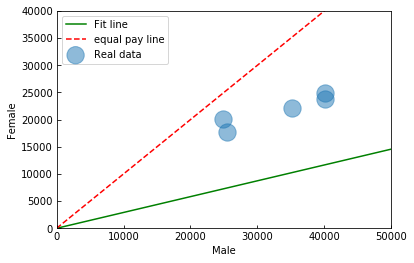

In [29]:

plt.scatter(median_male, median_female, marker = "o", s=300, alpha = 0.5, label = "Real data")
plt.ylabel('Female')
plt.xlabel('Male')
plt.ylim(0,40000)
plt.xlim(0,50000)
plt.plot(x_new, modelfit.predict(sm.add_constant(x_new)), "g", label = "Fit line")
plt.plot([0,50000],[0,50000],"r--", label = "equal pay line" )
plt.legend(loc=0)


# FBB missing figure caption
# FBB that fit is wrong! it goes nowhere near the data! it is a fit to random data instead of being a fit to the datapoints in the figure!

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [32]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

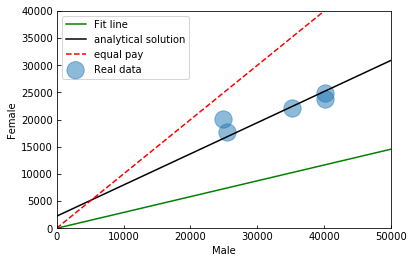

In [33]:
#...
def new_line(x, b0, b1):
    y_new = b0 + b1*x
    return y_new
    

plt.scatter(median_male, median_female, marker = "o", s=300, alpha = 0.5, label = "Real data")
plt.ylabel('Female')
plt.xlabel('Male')
plt.ylim(0,40000)
plt.xlim(0,50000)
plt.plot(x_new, modelfit.predict(sm.add_constant(x_new)), "g", label = "Fit line")


pl.plot(x_new, new_line(x_new, beta0, beta1), "k", label='analytical solution')
plt.plot([0,50000],[0,50000],"r--", label = "equal pay" )
plt.legend(loc=0)

# FBB That Fit line is obviously the wrong fit! It goes nowhere near the data! again: you fit a ine to data you made up instead of the data in the problem


# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [251]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [252]:
# fit and plot...

cor_masked= stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_masked = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_masked = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
beta0_masked , beta1_masked 


# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

(2017.5716833944698, 0.61944499882352544)

In [253]:
np.poly1d?

In [254]:

predict_masked = np.polyfit(all_males_allincomes[mask], all_females_allincomes[mask], 1)
predict_masked

array([  6.09020524e-01,   1.49303944e+03])

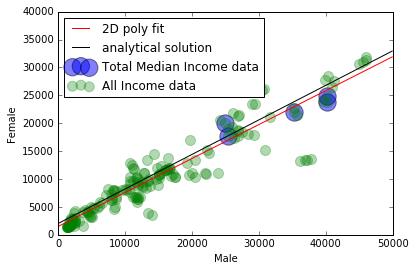

In [255]:
x_new = np.arange(0, 50000, 100)

predict_masked = np.polyfit(all_males_allincomes[mask], all_females_allincomes[mask], 1)
pl.plot(x_new, new_line(x_new, predict_masked[1] , predict_masked[0]) , 'r', alpha=1, 
        label = '2D poly fit')
plt.ylim(0,40000)
plt.xlim(0,50000)
plt.ylabel('Female')
plt.xlabel('Male')


plt.scatter(median_male, median_female, marker = "o", s=300, alpha = 0.5, label = "Total Median Income data")
plt.scatter(all_males_allincomes[mask],all_females_allincomes[mask],s=100, alpha = 0.3, color ="g", label = "All Income data")
plt.plot(x_new, new_line(x_new, beta0_masked, beta1_masked), "k", label='analytical solution')
plt.legend(loc = 0)



# FBB mising figure caption, also tiny figure, also this is not a 2D polyfit: it is a 1D problem (1 indepemdent variable) and a line is a 1 degree polynomial

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [256]:
#if the male pay is ideal
ideal_stipend = 98000
female_stipend = new_line(ideal_stipend, predict_masked[1] , predict_masked[0])# prediction
print ("A man will make %d and a woman will make %d, even the work is identical, by poly fit prediction"%(ideal_stipend, female_stipend))


A man will make 98000 and a woman will make 61177, even the work is identical, by poly fit prediction


# FBB well we do not know if the work is identical: there is no info on that in the data!

In [257]:
female_stipend_0 = new_line(ideal_stipend, beta0_masked, beta1_masked)
print ("A man will make %d and a woman will make %d, even the work is identical,by analytic solution prediction"%(ideal_stipend, female_stipend_0))

A man will make 98000 and a woman will make 62723, even the work is identical,by analytic solution prediction


# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

In [258]:
allmales['all']['Median income'].mean()
allmales['white']['Median income'].mean()

16682.088888888888

In [259]:
female_median= []
male_median= []
for k in ['all', 'white','black', 'hispanic', 'asian']:
    female_median.append(allfemales[k]['Median income'].median())
    male_median.append(allmales[k]['Median income'].median())
median = [female_median, male_median]

In [260]:
data = pd.DataFrame(median,index =["female", "male"], columns = ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian'])
data

,all,white,black,hispanic,asian
female,9507.5,9754.5,8733.0,6798.0,10346.0
male,13098.0,13975.0,12191.0,11558.0,11569.0


## To analyze income data from different races, between females and males. Interestingly, the gap of median income of Asian females and males seems the smallest. We can farther analyze the data to see if there is any linear regression between any two races, as well as look at other source of income. 

# FBB this affects your analysis, especially the gfirst part, because there is covariance between income, income dsparity and race. 